In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
pd.set_option('display.max_columns', 999)

# All Dataframes as CSV needed for vizualisation

bike_journey_data=pd.read_csv('bike_journey_data_27_mar_2020.csv')
weather_data=pd.read_csv('weather_data_27_mar_2020.csv')
bike_location_data=pd.read_csv('bike_location_data_27_March_2020.csv')

In [13]:
pd.set_option('display.max_columns', 999)
## This collapses down any cut of a dataset to get the count by route for each route_id
bike_journey_data['c'] = 1
def collapse_dataset(bike_journey_data, renamed_count):
    dataset_collapse = bike_journey_data.loc[:, ('Month', 'c')].groupby(['Month']).sum()
    dataset_collapse.reset_index(inplace=True)
    dataset_collapse.rename(columns={'c': str(renamed_count)}, inplace=True)
    return dataset_collapse

collapse_dataset = collapse_dataset(bike_journey_data, 'c')

print(collapse_dataset)

from bokeh.plotting import figure, output_file, show

period_collapse = bike_journey_data.loc[:, ('Hours', 'c', 'StartStation Name')].groupby(['Hours', 'StartStation Name']).sum()
period_collapse.reset_index(inplace=True)
period_collapse.rename(columns={'c': 'Count', 'Hours': 'Hours', 'StartStation Name':'StartStation Name'}, inplace=True)

period_collapse = bike_journey_data.loc[:, ('Day', 'c', 'Hours')].groupby(['Hours']).sum()
period_collapse.reset_index(inplace=True)
period_collapse.rename(columns={'c': 'Count', 'Hours': 'Hours'}, inplace=True)

period_collapse.head()
import plotly.express as px
fig = px.bar(period_collapse, x="Hours", y="Count", orientation='v')
fig.show()

    Month        c
0       1   507812
1       2   691770
2       3   784410
3       4   880513
4       5   995968
5       6   993747
6       7  1138703
7       8  1041301
8       9   955206
9      10   841772
10     11   721661
11     12   585492


In [14]:
period_collapse.head()

print (period_collapse.shape)

(24, 3)


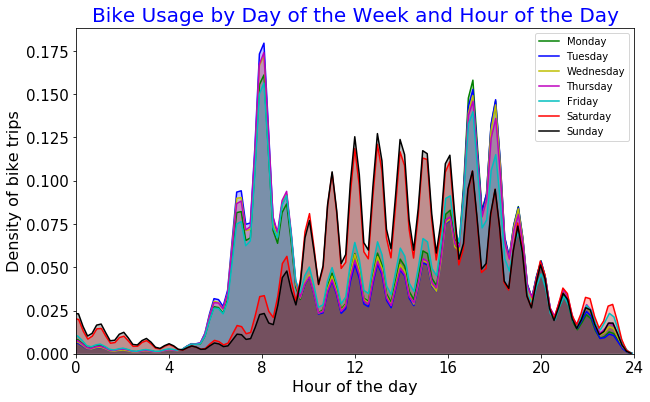

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

ax=f, axes = plt.subplots(1, 0, figsize=(10, 6), sharex=True)
sns.despine(left=True)

Monday = bike_journey_data.loc[bike_journey_data['Week Day'] == 0]
Tuesday=bike_journey_data.loc[bike_journey_data['Week Day'] == 1]
Wednesday=bike_journey_data.loc[bike_journey_data['Week Day'] == 2]
Thursday=bike_journey_data.loc[bike_journey_data['Week Day'] == 3]
Friday=bike_journey_data.loc[bike_journey_data['Week Day'] == 4]
Saturday=bike_journey_data.loc[bike_journey_data['Week Day'] == 5]
Sunday=bike_journey_data.loc[bike_journey_data['Week Day'] == 6]

sns.distplot(Monday[['Hours']], hist=False, color="g", bins=True, label='Monday', kde_kws={"shade": True})
sns.distplot(Tuesday[['Hours']], hist=False, color="b", label='Tuesday', kde_kws={"shade": True})
sns.distplot(Wednesday[['Hours']], hist=False, color="y", label='Wednesday', kde_kws={"shade": True} )
sns.distplot(Thursday[['Hours']], hist=False, color="m", label='Thursday', kde_kws={"shade": True}  )
sns.distplot(Friday[['Hours']], hist=False, color="c", label='Friday', kde_kws={"shade": True} )
sns.distplot(Saturday[['Hours']], hist=False, color="r", label='Saturday', kde_kws={"shade": True})
sns.distplot(Sunday[['Hours']], hist=False, color="k", label='Sunday', kde_kws={"shade": True})

plt.xlabel("Hour of the day", fontsize=16)
plt.ylabel("Density of bike trips", fontsize=16)
plt.title("Bike Usage by Day of the Week and Hour of the Day", fontsize=20, color="b")
plt.xlim(0, 24)
plt.xticks([0, 4, 8, 12, 16, 20, 24], fontsize=15)
plt.yticks(fontsize=15)

plt.show()
#plt.savefig("distribution.png", format='png')

In [16]:
bike_journey_data["weekday"] = bike_journey_data['Week Day'].apply(lambda x: 1 if x>=0 else 0) & bike_journey_data['Week Day'].apply(lambda x: 1 if x<=4 else 0)
bike_journey_data["weekend"] = bike_journey_data['Week Day'].apply(lambda x: 1 if x>=5 else 0) & bike_journey_data['Week Day'].apply(lambda x: 1 if x==6 else 0)


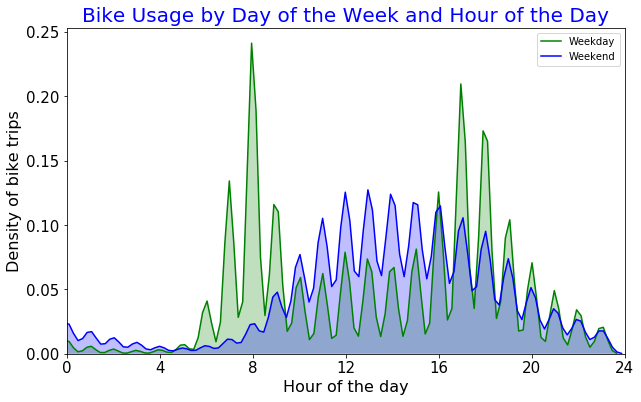

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

ax=f, axes = plt.subplots(1, 0, figsize=(10, 6), sharex=True)
sns.despine(left=True)

Weekday = bike_journey_data.loc[bike_journey_data['weekday'] == 1]
Weekend=bike_journey_data.loc[bike_journey_data['weekend'] == 1]

sns.distplot(Weekday[['Hours']], hist=False, color="g", label='Weekday', kde_kws={"shade": True})
sns.distplot(Weekend[['Hours']], hist=False, color="b", label='Weekend', kde_kws={"shade": True})

plt.xlabel("Hour of the day", fontsize=16)
plt.ylabel("Density of bike trips", fontsize=16)
plt.title("Bike Usage by Day of the Week and Hour of the Day", fontsize=20, color="b")
plt.xlim(0, 24)
plt.xticks([0, 4, 8, 12, 16, 20, 24], fontsize=15)
plt.yticks(fontsize=15)

plt.show()
#plt.savefig("distribution.png", format='png')

In [18]:
## Graphing stations by capacity
'''dff = (bike_location_data.sort_values(by='Capacity', ascending=False).head(10))

fig = px.bar(dff, x="Bike station", y="Capacity", orientation='v', labels={'Capacity':'Number of bikes', 'Bike station': ''})

fig.update_traces(marker_color='rgb(0,125,255)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Bike Statistions in London with Largest Bike Capacity', xaxis_tickangle=-90, xaxis_tickfont_size=11)

fig.show()
                                                                        
bike_location_data.head()

#print(bike_location_data.shape)'''

'dff = (bike_location_data.sort_values(by=\'Capacity\', ascending=False).head(10))\n\nfig = px.bar(dff, x="Bike station", y="Capacity", orientation=\'v\', labels={\'Capacity\':\'Number of bikes\', \'Bike station\': \'\'})\n\nfig.update_traces(marker_color=\'rgb(0,125,255)\', marker_line_color=\'rgb(8,48,107)\',\n                  marker_line_width=1.5, opacity=0.6)\nfig.update_layout(title_text=\'Bike Statistions in London with Largest Bike Capacity\', xaxis_tickangle=-90, xaxis_tickfont_size=11)\n\nfig.show()\n                                                                        \nbike_location_data.head()\n\n#print(bike_location_data.shape)'

In [19]:
'''df=df.loc[:5]

from pandas.plotting import table

#set a figure space
fig, ax = plt.subplots(figsize=(10, 5))

#get rid of axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)

#no frame
ax.set_frame_on(False) 

#turn DataFrame into a table format
tab = table(ax,
            df,
            loc="upper right", )


#set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(10)

#set table size
tab.scale(3, 3)

#save table as a .png file
plt.savefig("table_2.png", format='jpeg', dpi=500)'''

'df=df.loc[:5]\n\nfrom pandas.plotting import table\n\n#set a figure space\nfig, ax = plt.subplots(figsize=(10, 5))\n\n#get rid of axes\nax.xaxis.set_visible(False) \nax.yaxis.set_visible(False)\n\n#no frame\nax.set_frame_on(False) \n\n#turn DataFrame into a table format\ntab = table(ax,\n            df,\n            loc="upper right", )\n\n\n#set font manually\ntab.auto_set_font_size(False)\ntab.set_fontsize(10)\n\n#set table size\ntab.scale(3, 3)\n\n#save table as a .png file\nplt.savefig("table_2.png", format=\'jpeg\', dpi=500)'

In [20]:
bike_journey_data['bike_trips_by_day'] = 1
def bike_trips_by_day(bike_journey_data, renamed_count):
    bike_trips_by_day = bike_journey_data.loc[:, ('id', 'bike_trips_by_day')].groupby(['id']).sum()
    bike_trips_by_day.reset_index(inplace=True)
    bike_trips_by_day.rename(columns={'bike_trips_by_day': str(renamed_count)}, inplace=True)
    return bike_trips_by_day
bike_trips_by_day = bike_trips_by_day(bike_journey_data, 'bike_trips_by_day')

bike_journey_data= bike_journey_data.merge(right=bike_trips_by_day,
                             left_on = 'id',
                             right_on = 'id')

In [21]:
temperature_by_day=weather_data.groupby(['id']).agg({'temperature':np.mean})
rain_by_day=weather_data.groupby(['id']).agg({'precipIntensity':np.mean})
humidity_by_day=weather_data.groupby(['id']).agg({'humidity':np.mean})
temperature_by_day['id_new']=temperature_by_day.index
temperature_by_day['rain_by_day']=rain_by_day
temperature_by_day['humidity']=humidity_by_day

##Merge Bike Data with Weather Data and plot the daily correlation between weather and bike trips taken each day

bike_weather_data= bike_journey_data.merge(right=temperature_by_day,
                             left_on = 'id',
                             right_on = 'id_new')
duration_by_day=bike_weather_data.groupby(['id_new']).agg({'Duration in minutes':np.mean})

duration_by_day= bike_weather_data.merge(right=duration_by_day,
                             left_on = 'id',
                             right_on = 'id_new')

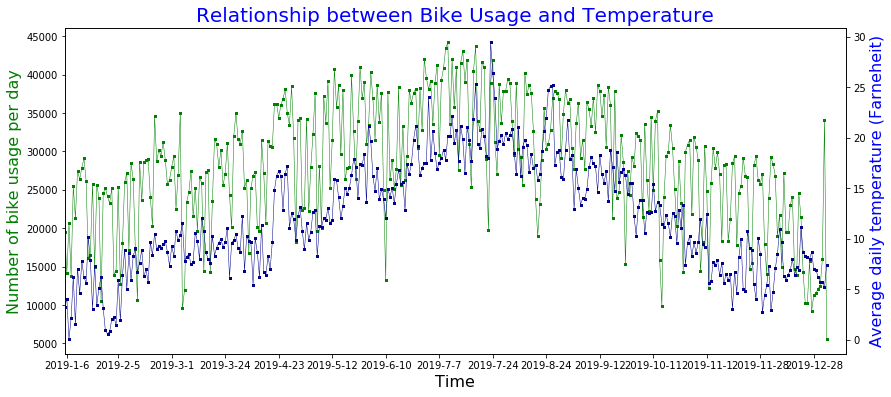

In [22]:
##bike usage and weather conditions / daily picture

fig,ax = plt.subplots(figsize=(14, 6))
# make a plot
ax.plot(bike_weather_data.id_new, bike_weather_data.bike_trips_by_day_y, color="green", marker='o',
        linewidth=0.5, markersize=2)

# set x-axis label
ax.set_xlabel("Time",fontsize=16)
# set y-axis label
ax.grid(False)
ax.set_ylabel("Number of bike usage per day",color="green",fontsize=16)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(bike_weather_data.id_new, bike_weather_data.temperature,color="darkblue", marker='o',
        linewidth=0.5, markersize=2)
ax2.set_ylabel("Average daily temperature (Farneheit)",color="blue",fontsize=16)
ax2.grid(False)
#for tick in ax.get_xticklabels():
 #   tick.set_rotation(90)

plt.title("Relationship between Bike Usage and Temperature", fontsize=20, color="b")

plt.xlim(0, 365)

plt.xticks([1, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350], fontsize=18)

#ax.set_facecolor((1.0, 1.0, 1.0))

plt.show()

# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
          #  format='jpeg',
          #  dpi=1000)

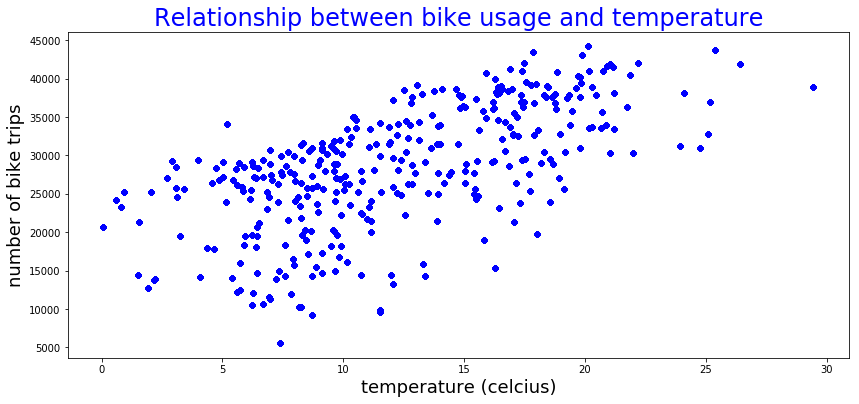

In [23]:
ax= bike_weather_data.plot(kind='scatter', x='temperature',y='bike_trips_by_day_y', color='blue',alpha=0.5, figsize=(14,6))
#plt.legend(labels=['Males','Females'])
plt.title('Relationship between bike usage and temperature', size=24, color="blue")
plt.xlabel('temperature (celcius)', size=18)
plt.ylabel('number of bike trips', size=18)
plt.show()

In [24]:
bike_weather_data['bike_trips_by_station'] = 1
def bike_trips_by_station(bike_weather_data, renamed_count):
    bike_trips_by_station = bike_weather_data.loc[:, ('StartStation Id', 'bike_trips_by_station')].groupby(['StartStation Id']).count()
    bike_trips_by_station.reset_index(inplace=True)
    bike_trips_by_station.rename(columns={'bike_trips_by_station': str(renamed_count)}, inplace=True)
    return bike_trips_by_station
bike_trips_by_station = bike_trips_by_station(bike_weather_data, 'bike_trips_by_station')

bike_weather_data= bike_weather_data.merge(right=bike_trips_by_station,
                             left_on = 'StartStation Id',
                             right_on = 'StartStation Id')

In [25]:
bike_weather_data.head()

Unnamed: 0  Rental Id  Duration  Bike Id          End Date  EndStation Id  \
0           0   83284852       660     8282  02/01/2019 17:47             94   
1       16917   83274446       420     7954  02/01/2019 08:59            703   
2       16918   83275558       720     4943  02/01/2019 09:36            126   
3       16951   83283532       660     8176  02/01/2019 17:17            269   
4       27560   83285513      1380     3377  02/01/2019 18:13            201   

              EndStation Name        Start Date  StartStation Id  \
0   Bricklayers Arms, Borough  02/01/2019 17:36              197   
1   St. Bride Street, Holborn  02/01/2019 08:52              197   
2  Museum of London, Barbican  02/01/2019 09:24              197   
3  Empire Square, The Borough  02/01/2019 17:06              197   
4   Dorset Square, Marylebone  02/01/2019 17:50              197   

             StartStation Name Start Date Converted End Date Converted  Hours  \
0  Stamford Street, South Bank           2019-01-02         2019-01-02     17   
1  Stamford Street, South Bank           2019-01-02         2019-01-02      8   
2  Stamford Street, South Bank           2019-01-02         2019-01-02      9   
3  Stamford Street, South Bank           2019-01-02         2019-01-02     17   
4  Stamford Street, South Bank           2019-01-02         2019-01-02     17   

   Week Day  Day  Month  Year  Duration in minutes        id       id_hours  \
0         2    2      1  2019                 11.0  2019-1-2  2019-01-02-17   
1         2    2      1  2019                  7.0  2019-1-2   2019-01-02-8   
2         2    2      1  2019                 12.0  2019-1-2   2019-01-02-9   
3         2    2      1  2019                 11.0  2019-1-2  2019-01-02-17   
4         2    2      1  2019                 23.0  2019-1-2  2019-01-02-17   

   c  weekday  weekend  bike_trips_by_day_x  bike_trips_by_day_y  temperature  \
0  1        1        0                    1                19552     3.259583   
1  1        1        0                    1                19552     3.259583   
2  1        1        0                    1                19552     3.259583   
3  1        1        0                    1                19552     3.259583   
4  1        1        0                    1                19552     3.259583   

     id_new  rain_by_day  humidity  bike_trips_by_station_x  \
0  2019-1-2          0.0  0.724583                        1   
1  2019-1-2          0.0  0.724583                        1   
2  2019-1-2          0.0  0.724583                        1   
3  2019-1-2          0.0  0.724583                        1   
4  2019-1-2          0.0  0.724583                        1   

   bike_trips_by_station_y  
0                    15365  
1                    15365  
2                    15365  
3                    15365  
4                    15365

In [26]:
'''data_collapse = bike_journey_data.loc[:, ('StartStation Id', 'c')].groupby(['StartStation Id']).sum()
data_collapse.reset_index(inplace=True)
data_collapse.rename(columns={'c': 'Count', 'StartStation Id': 'StartStation Id'}, inplace=True)'''


'''fig, ax = plt.subplots(figsize=(10,7))  

colors = ["#006D2C", "#31A354","#74C476"]

period_collapse[period_collapse['Count'] > 40000].plot.bar(x='StartStation Id',y='Count', ax=ax, stacked=True, label='Count')

plt.show()'''

'fig, ax = plt.subplots(figsize=(10,7))  \n\ncolors = ["#006D2C", "#31A354","#74C476"]\n\nperiod_collapse[period_collapse[\'Count\'] > 40000].plot.bar(x=\'StartStation Id\',y=\'Count\', ax=ax, stacked=True, label=\'Count\')\n\nplt.show()'

In [27]:
weekday = bike_weather_data.loc[bike_weather_data['weekday'] == 1]
weekend = bike_weather_data.loc[bike_weather_data['weekday'] == 0]

weekday = weekday.loc[:, ('StartStation Name', 'bike_trips_by_station_y')].groupby(['StartStation Name']).count()
weekend = weekend.loc[:, ('StartStation Name', 'bike_trips_by_station_y')].groupby(['StartStation Name']).count()
df_merge = pd.merge(weekday, weekend, on='StartStation Name')


In [28]:
df_merge.head()

bike_trips_by_station_y_x  \
StartStation Name                                              
Abbey Orchard Street, Westminster                      14176   
Abbotsbury Road, Holland Park                           2694   
Aberdeen Place, St. John's Wood                         4386   
Aberfeldy Street, Poplar                                1532   
Abingdon Green, Westminster                            13864   

                                   bike_trips_by_station_y_y  
StartStation Name                                             
Abbey Orchard Street, Westminster                       2257  
Abbotsbury Road, Holland Park                           1415  
Aberdeen Place, St. John's Wood                         1745  
Aberfeldy Street, Poplar                                 557  
Abingdon Green, Westminster                             4528

In [29]:
df_merge = (df_merge.sort_values(by='bike_trips_by_station_y_x', ascending=False).head(30))

df_merge['Station']=df_merge.index

df_merge.rename(columns={'bike_trips_by_station_y_x': 'Weekday, Count', 'bike_trips_by_station_y_y': 'Weekend, Count'}, inplace=True)

df_merge.head()

Weekday, Count  Weekend, Count  \
StartStation Name                                                   
Belgrove Street , King's Cross              75700            7290   
Waterloo Station 3, Waterloo                73305            3136   
Waterloo Station 1, Waterloo                60517            4187   
Hyde Park Corner, Hyde Park                 43471           27365   
Wormwood Street, Liverpool Street           40296            4373   

                                                             Station  
StartStation Name                                                     
Belgrove Street , King's Cross        Belgrove Street , King's Cross  
Waterloo Station 3, Waterloo            Waterloo Station 3, Waterloo  
Waterloo Station 1, Waterloo            Waterloo Station 1, Waterloo  
Hyde Park Corner, Hyde Park              Hyde Park Corner, Hyde Park  
Wormwood Street, Liverpool Street  Wormwood Street, Liverpool Street

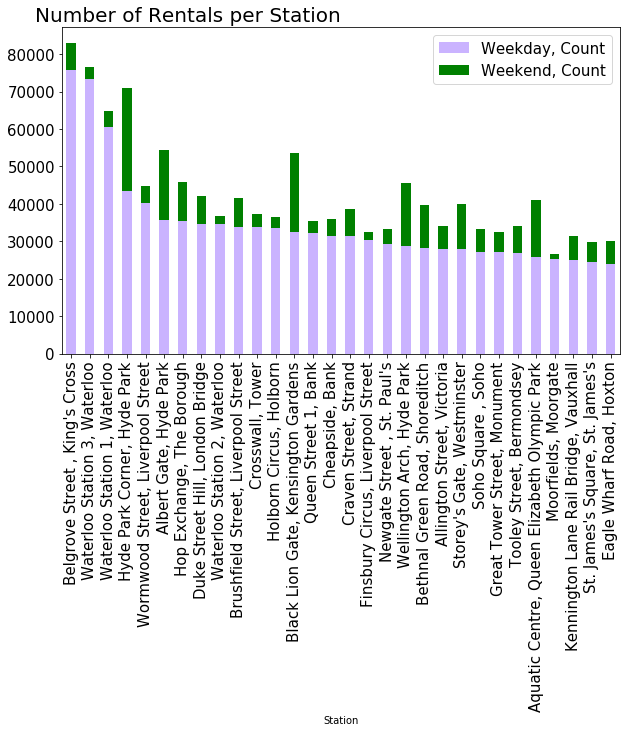

In [30]:
colors = ["#cab3ff", "green"]

x= df_merge[['Weekday, Count','Weekend, Count', 'Station']]
y= x.set_index('Station')
z=y.groupby('Station').mean().sort_values(by='Weekday, Count', ascending=False)

z.plot.bar(stacked=True, color=colors,figsize=(10,6))

plt.title("Number of Rentals per Station", fontsize=20, color="k", ha='right')

plt.legend(['Weekday, Count', 'Weekend, Count'], fontsize=15)

plt.yticks(fontsize=15)

plt.xticks(fontsize=15)


plt.show()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [32]:
#df=bike_journey_data.groupby(['Hours', 'StartStation Name']).bike_trips_by_hour_y.sum().reset_index()
#pd.options.display.float_format = '{:.2f}'.format

period_collapse_start = bike_journey_data.loc[:, ('Hours', 'c', 'StartStation Name')].groupby(['Hours', 'StartStation Name']).sum()
period_collapse_start.reset_index(inplace=True)
period_collapse_start.rename(columns={'c': 'Count', 'Hours': 'Hours', 'StartStation Name':'Station'}, inplace=True)
period_collapse_start.head()


Hours                            Station  Count
0      0  Abbey Orchard Street, Westminster     87
1      0      Abbotsbury Road, Holland Park     22
2      0    Aberdeen Place, St. John's Wood     16
3      0           Aberfeldy Street, Poplar     10
4      0        Abingdon Green, Westminster    154

In [33]:
#df['group']=pd.qcut(df['bike_trips_by_hour_y'], [0,0.25,0.5,0.75,1], labels=False)
bin_labels_5 = ['0-quantile', '.1-quantile', '.2-quantile', '.3-quantile', '.4-quantile', '.5-quantile', '.6-quantile', '.7-quantile', '.8-quantile', '.9-quantile']
period_collapse_start['quantile'] = pd.qcut(period_collapse_start['Count'],
                              q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
                              labels=bin_labels_5)
period_collapse_start.head(100)

Hours                            Station  Count     quantile
0       0  Abbey Orchard Street, Westminster     87  .2-quantile
1       0      Abbotsbury Road, Holland Park     22   0-quantile
2       0    Aberdeen Place, St. John's Wood     16   0-quantile
3       0           Aberfeldy Street, Poplar     10   0-quantile
4       0        Abingdon Green, Westminster    154  .3-quantile
..    ...                                ...    ...          ...
95      0      Bramham Gardens, Earl's Court    226  .4-quantile
96      0          Breams Buildings, Holborn     36  .1-quantile
97      0      Brick Lane Market, Shoreditch    332  .5-quantile
98      0          Bricklayers Arms, Borough     96  .2-quantile
99      0         Bridge Avenue, Hammersmith     92  .2-quantile

[100 rows x 4 columns]

In [34]:
colors = dict(zip(['0-quantile', '.1-quantile', '.2-quantile', '.3-quantile', '.4-quantile', '.5-quantile', '.6-quantile', '.7-quantile', '.8-quantile', '.9-quantile'],['#adb0ff', '#b8ffb3', '#ffefb3', '#ffc6b3', '#b3cfff', '#ffb3ff', '#90d595', '#cab3ff', '#e48381','#aafbff']))
group_lk = period_collapse_start.set_index('Station')['quantile'].to_dict()

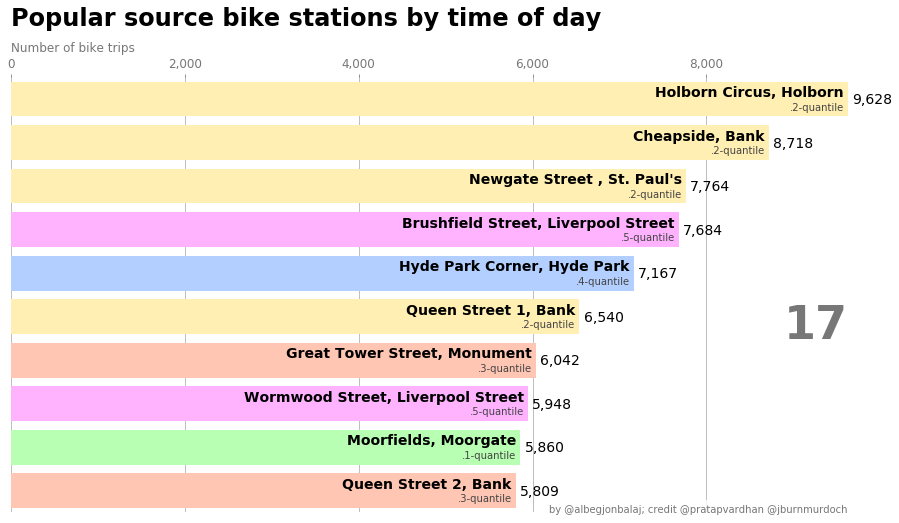

In [42]:
## Graphing top 10 largest source bike stations by time of the day

fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(current_time_1):
    df = period_collapse_start[period_collapse_start['Hours'].eq(current_time_1)].sort_values(by='Count', ascending=True).tail(10)
    ax.clear()
    ax.barh(df['Station'], df['Count'], color=[colors[group_lk[x]] for x in df['Station']])
    dx = df['Count'].max() / 200
    for i, (Count, Station) in enumerate(zip(df['Count'], df['Station'])):
        ax.text(Count-dx, i,     Station,           size=14, weight=600, ha='right', va='bottom')
        ax.text(Count-dx, i-.25, group_lk[Station], size=10, color='#444444', ha='right', va='baseline')
        ax.text(Count+dx, i,     f'{Count:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, current_time_1, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Number of bike trips', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Popular source bike stations by time of day',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @albegjonbalaj; credit @pratapvardhan @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(17)

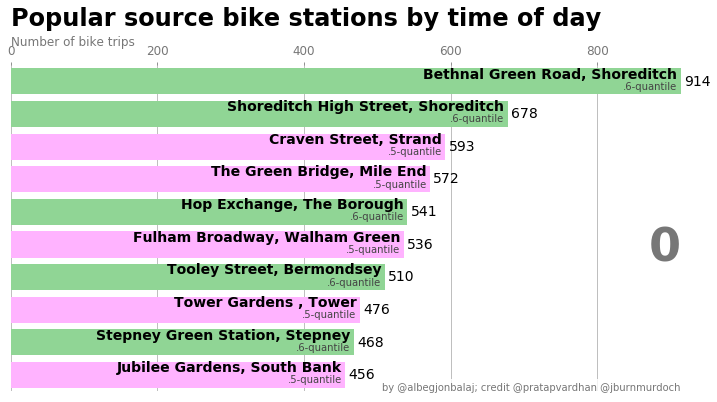

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))
from IPython.display import HTML
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(0, 24))
HTML(animator.to_jshtml())
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
animator.save('animation.mp4', writer=writer)

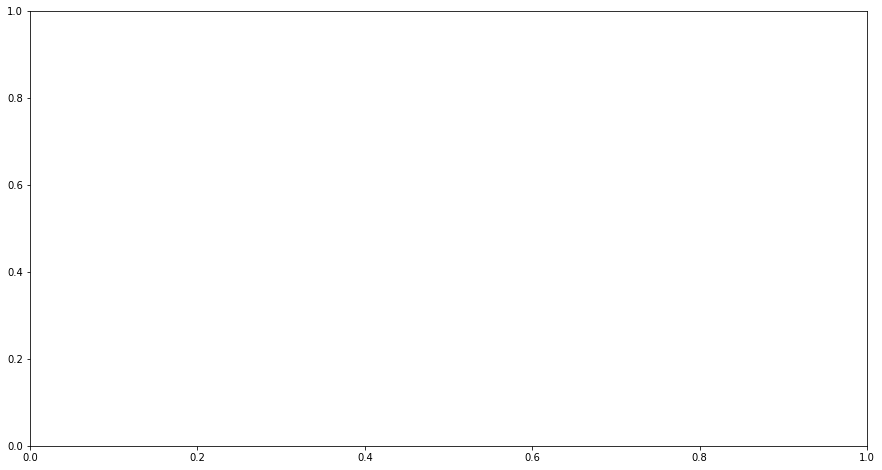

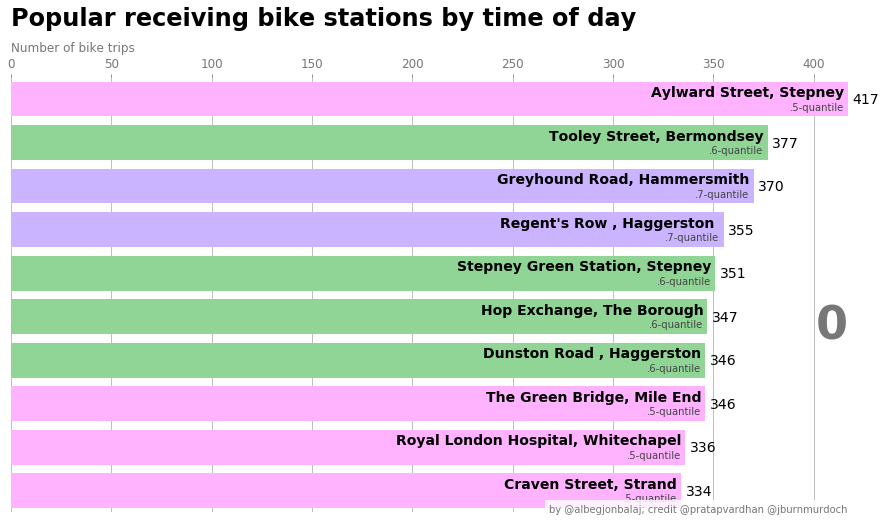

In [37]:
## Graphing top 10 largest receiving bike stations by time of the day

period_collapse_end = bike_journey_data.loc[:, ('Hours', 'c', 'EndStation Name')].groupby(['Hours', 'EndStation Name']).sum()
period_collapse_end.reset_index(inplace=True)
period_collapse_end.rename(columns={'c': 'Count', 'Hours': 'Hours', 'EndStation Name':'Station'}, inplace=True)
period_collapse_end.head()

bin_labels_5 = ['0-quantile', '.1-quantile', '.2-quantile', '.3-quantile', '.4-quantile', '.5-quantile', '.6-quantile', '.7-quantile', '.8-quantile', '.9-quantile']
period_collapse_end['quantile'] = pd.qcut(period_collapse_end['Count'],
                              q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
                              labels=bin_labels_5)
period_collapse_end.head(100)

colors = dict(zip(['0-quantile', '.1-quantile', '.2-quantile', '.3-quantile', '.4-quantile', '.5-quantile', '.6-quantile', '.7-quantile', '.8-quantile', '.9-quantile'],['#adb0ff', '#b8ffb3', '#ffefb3', '#ffc6b3', '#b3cfff', '#ffb3ff', '#90d595', '#cab3ff', '#e48381','#aafbff']))
group_lk = period_collapse_end.set_index('Station')['quantile'].to_dict()

## Graphing top 10 largest source bike stations by time of the day

fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(current_time_1):
    df = period_collapse_end[period_collapse_end['Hours'].eq(current_time_1)].sort_values(by='Count', ascending=True).tail(10)
    ax.clear()
    ax.barh(df['Station'], df['Count'], color=[colors[group_lk[x]] for x in df['Station']])
    dx = df['Count'].max() / 200
    for i, (Count, Station) in enumerate(zip(df['Count'], df['Station'])):
        ax.text(Count-dx, i,     Station,           size=14, weight=600, ha='right', va='bottom')
        ax.text(Count-dx, i-.25, group_lk[Station], size=10, color='#444444', ha='right', va='baseline')
        ax.text(Count+dx, i,     f'{Count:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, current_time_1, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Number of bike trips', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Popular receiving bike stations by time of day',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @albegjonbalaj; credit @pratapvardhan @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(17)

fig, ax = plt.subplots(figsize=(15, 8))
animator2 = animation.FuncAnimation(fig, draw_barchart, frames=range(0, 23))
HTML(animator2.to_jshtml())
animator2.save('animation.mp4', writer=writer)